In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/alirachidi/Documents/Sonavi Labs/classification_algorithm/trainers')

from soundofnavi.main import parameters as p
from soundofnavi.dataset.Dataset import Dataset
from soundofnavi.dataset.IcbhiDataset import IcbhiDataset
from soundofnavi.patient.Patient import Patient
from soundofnavi.recording.Recording import Recording
from soundofnavi.slice.Slice import Slice
from soundofnavi.audio_loader.helpers import default_get_filenames, bd_get_filenames, perch_get_filenames
from soundofnavi.main.helpers import *
from soundofnavi.main.global_helpers import *

import pandas as pd

ModuleNotFoundError: No module named 'modules'

In [ ]:
icbhi_official_labels_path = "/Users/alirachidi/Documents/Sonavi Labs/classification_algorithm/data/raw_audios/icbhi_preprocessed_v2_8000/official_labels.txt"
icbhi_metadata_path = "/Users/alirachidi/Documents/Sonavi Labs/classification_algorithm/data/raw_audios/demographic_info.txt"
# /Users/alirachidi/Documents/Sonavi Labs/classification_algorithm/data/raw_audios/icbhi_preprocessed_v2_8000

In [ ]:
args={"mode": "other", "description": "none", "testing": 0}
p.init(args, "discover_notebook")
datasets = []
datasets_selection = {"Icbhi": 1}
# if datasets["Jordan"]:
#         datasets.append(JordanDataset(
#             p.jordan_root))
# if datasets["Bd"]:
#     datasets.append(BdDataset(
#         p.bd_root, p.excel_path))
# if datasets["Perch"]:
#     datasets.append(PerchDataset(
#         p.perch_root))
if datasets_selection["Icbhi"]:
    icbhi_dataset = IcbhiDataset(
        "Icbhi", p.icbhi_root, p.icbhi_metadata_root, default_get_filenames)
    datasets.append(icbhi_dataset)
# if datasets["Ant"]:
#     # TODO: pass names?
#     ant_loader = AntwerpDataset(
#         p.ant_root)
#     ant_loader.name = "Antwerp"
#     datasets.append(ant_loader)

-- Collecting Variables... --
Tensorflow Version: 2.12.0
Num GPUs Available:  1
File dir is ../../../cache/pneumonia/notebook
First job directory is ../../../cache/pneumonia/notebook/1
PID: 64385
Description: none
-- All variables have been collected. --


In [ ]:
audios_dict = {}
for d in datasets:
    d.load_recordings()
    d.prepare_slices()
    #TODO: write a custom flatenning of dictionary function
    slices_by_patient = d.return_slices_by_patient()
    audios_dict[d.id] = slices_by_patient
    # print(slices_by_patient.keys())
    # print(slices_by_patient[122])
    # recordings_by_patient = d.return_recordings_by_patient()
    # print(recordings_by_patient.keys())
    # print(recordings_by_patient[122])
    # print(recordings_by_patient[122].keys())
    # slices_by_recording_by_patient = d.return_slices_by_recording_by_patient()
    # print(slices_by_recording_by_patient.keys())
    # print(slices_by_recording_by_patient[122])
    # print(slices_by_recording_by_patient[122].keys())
    # print(slices_by_recording_by_patient[122]['122_2b1_Tc_mc_LittC2SE'])
    # print(d.id)
    # print(d.patients[122].id)
    # print(d.patients[122].recordings['122_2b1_Tc_mc_LittC2SE'].id)
    # print(d.patients[122].recordings['122_2b1_Tc_mc_LittC2SE'].label)
    # print(d.patients[122].recordings['122_2b1_Tc_mc_LittC2SE'].slices)
    # print(d.patients[122].recordings['122_2b1_Tc_mc_LittC2SE'].slices['122_2b1_Tc_mc_LittC2SE_0'].id)
    # print(d.patients[122].recordings['122_2b1_Tc_mc_LittC2SE'].slices['122_2b1_Tc_mc_LittC2SE_0'].label)
train_audios_dict, val_audios_dict = split_and_extend(
        audios_dict, p.train_test_ratio, kfold=True)
# print(len(train_audios_dict[0]['Icbhi']))
# print(len(val_audios_dict[0]['Icbhi']))

--- Samples are being split into training/val groups by patient by dataset ---


yo
(1, 80000)
(80000,)
(80000,)
(80000,)
(80000,)
[[ 0.11793518  0.12794495  0.13682556 ... -0.07286072 -0.06399536
  -0.03109741]]
(1, 80000)
(1, 80000)
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/alirachidi/miniconda3/envs/ml/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/yp/l_t6f1mn0yqclvv5qdshg2xr0000gn/T/ipykernel_64385/1016268891.py", line 1, in <module>
    icbhi_dataset.analyze()
  File "/Users/alirachidi/Documents/Sonavi Labs/classification_algorithm/trainers/modules/dataset/Dataset.py", line 277, in analyze
    exit()
NameError: name 'exit' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/alirachidi/miniconda3/envs/ml/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/alirachidi/miniconda3/envs/ml/lib/python3.9/site-packages/IPython/core/ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_tr

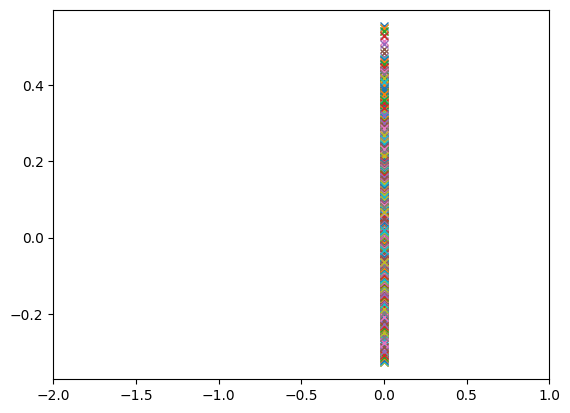

In [ ]:
icbhi_dataset.analyze()

In [ ]:
# data = [next(iter(icbhi_dataset.patients[122].recordings.values())), 
#         next(iter(icbhi_dataset.patients[101].recordings.values())), 
#         next(iter(icbhi_dataset.patients[102].recordings.values())), 
#         next(iter(icbhi_dataset.patients[103].recordings.values())), 
# ]
# plot(data, subplot_data_func=lambda a:a.audio, subplot_title_func=lambda a: a.label, nrows=2, ncols=2)

In [ ]:
# df_no_diagnosis = pd.read_csv(df_path, names = 
#                  ['Patient_id', 'Age', 'Sex' , 'Adult BMI (kg/m2)', 'Child Weight (kg)' , 'Child Height (cm)'],
#                  delimiter = ' ')

# file1 = open(official_labels_path, 'r')
# lines = file1.readlines()
# val_files = []
# train_files = []
# val_patients = []
# train_patients = []
# val_devices = []
# train_devices = []

# for l in lines:
#     els = l.split()
#     patient_id = els[0].split('_')[0]
#     device = els[0].split('_')[-1]
#     if els[1] == "train":
#         train_files.append(els[0])
#         if not (patient_id in train_patients):
#             train_patients.append(patient_id)
#             train_devices.append(device)
#     else:
#         val_files.append(els[0])
#         if not (patient_id in val_patients):
#             val_patients.append(patient_id)
#             val_devices.append(device)

In [ ]:
# for t in set(train_devices):
#     print("{} {}".format(train_devices.count(t), t))
# print('val')
# for t in set(val_devices):
#     print("{} {}".format(val_devices.count(t), t))


In [ ]:
# ages = []
# for t in val_patients:
#     print(t)
#     el = df_no_diagnosis[df_no_diagnosis['Patient_id'] == int(t)]
#     print(el)
#     break
#     ages.append(el['Age'])
# print(ages)


In [ ]:
# plot patient profile with a custom func:
## plots the recordings w metadata
## plots the slices w metadata
## plots the inflection points of waves
## crying detection
## spectrograms under diff processing
### => includes audios and specs
### => add average and std mode(choose 1 to all)

# model
## plots the gradcam
## inputs to ouputs 
## analyze layers
## garbage/random sounds/white noise/heartbeath/high frequency input analysis
## performance profile
## UQ
## confidence analysis
## plots of stats about the model
### train VS Val